帰無仮説：２年で１割（２０時間）劣化していない
対立仮設：２年で１割（２０時間）劣化している

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns

from scipy import stats

df = pd.read_csv("batteries_hours.csv")


In [5]:
# データ件数を表示かデータを表示しろか不明なので両方やる
df.shape


(500, 2)

In [6]:
df.head()

,new,year2
0,200.614633,181.027960
1,199.716863,164.124190
2,205.733141,171.638352
3,193.768958,174.801830
4,206.248877,198.362352


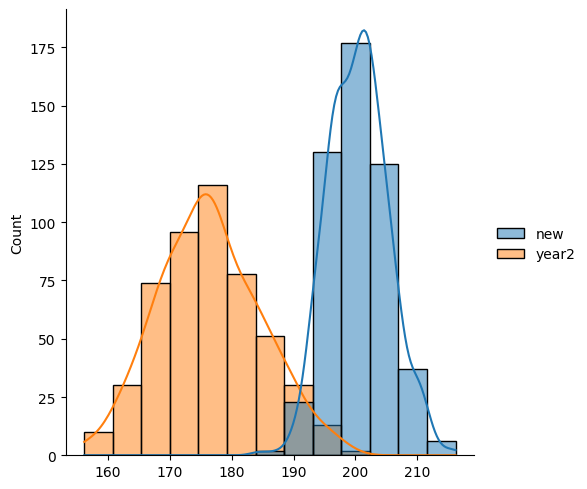

In [7]:
# 列が２つしかないのでこれでいいのか
sns.displot(df, kde=True)

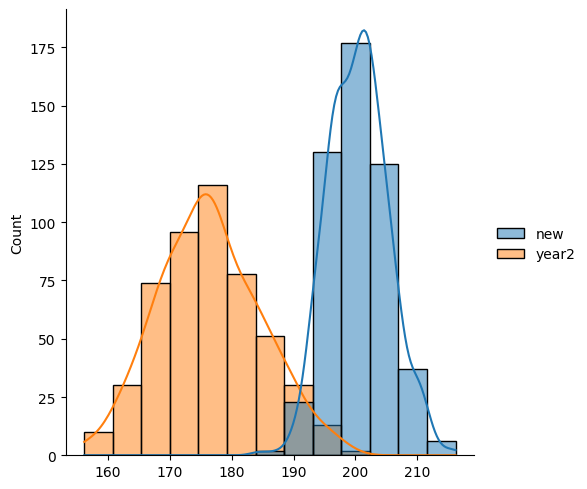

In [8]:
# 一応分割して表示もやっておく
df2 = pd.DataFrame(columns=['new','year2'])
df2["new"] = df["new"]
df2["year2"] = df["year2"]

sns.displot(df2, kde=True)

In [9]:
# 母平均
mu_new =np.mean(df2["new"])
print(mu_new)

mu_year2 =np.mean(df2["year2"])
print(mu_year2)

200.4746372262155
176.4021507111103


In [10]:
# 95%信頼区間の下限値と上限値
def interval(data, mu):
    sigma = np.std(data, ddof=1)
    se = sigma/np.sqrt(len(data))

    df2_cnt = len(data) - 1
    interval = stats.t.interval(0.95, df2_cnt, loc=mu, scale=se)

    return interval

In [11]:
# 95%信頼区間の下限値と上限値
interval_new = interval(df2["new"], mu_new)
print(interval_new)

interval_year2 = interval(df2["year2"], mu_year2)
print(interval_year2)

(np.float64(200.0533518842937), np.float64(200.89592256813728))
(np.float64(175.67364051788377), np.float64(177.13066090433682))


In [12]:
# new と year2 の時間の差
df2["diff"] = df2["new"] - df2["year2"]

df2["diff"] 

0      19.586673
1      35.592673
2      34.094789
3      18.967128
4       7.886525
         ...    
495    22.061941
496    24.094891
497    38.786891
498     4.893356
499     4.128383
Name: diff, Length: 500, dtype: float64

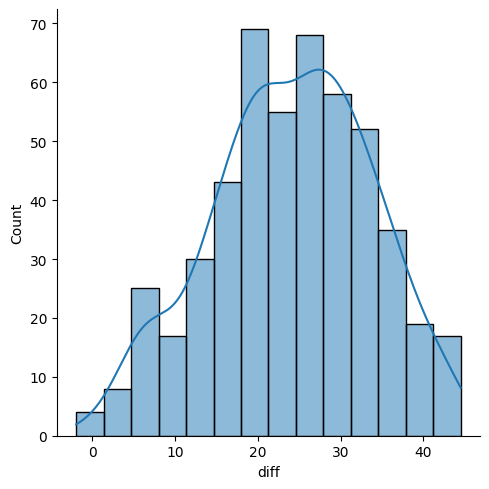

In [13]:
# その時間の差に関するヒストグラムと分布を描画
sns.displot(df2["diff"], kde=True)

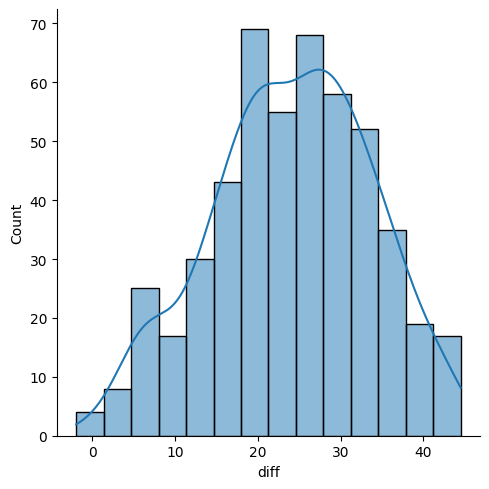

In [14]:
sns.displot(df2["diff"], kde=True)

In [15]:
# その時間の差を使い、対応のあるt検定を実施
# 標準誤差
sigma = np.std(df2["diff"], ddof=1)
se = sigma/np.sqrt(len(df2["diff"]))

# 標本平均
mu = df2["diff"].mean()

# （標本平均 - 母平均）/ 標準誤差
t_val = (mu-20)/se

# 自由度
df = len(df2["diff"]) - 1

# 両側検定のp値
p_val = 2 * (1 - stats.t.cdf(abs(t_val), df=df))

# p_valは1.1594662512929281e-19のはずだが、小さすぎる為、Jupyter Notebookが0にしているのか？
print(t_val, p_val)

9.465273816769795 0.0


In [16]:
# t検定が正しいか確認
t_value, p_value = stats.ttest_1samp(df2["diff"], 20)

print(t_value, p_value)

9.465273816769793 1.1594662512929281e-19


t_valueの値が大きく、p_valueの値がほぼ０である事から、帰無仮説を棄却する

In [18]:
# # 20以上が333もあるからダメだよね
# df_20_over = df2[df2["diff"] > 20]
# df_20_under = df2[df2["diff"] <= 20]

# print(len(df_20_over), df_20_over["diff"].mean(), len(df_20_under), df_20_under["diff"].mean())
# print(len(df_20_over) / len(df2["diff"])  * 100)

333 29.48458538900367 167 13.280696544996214
66.60000000000001
